# Training dataset exploration

This notebook's purpose is to show exploratory analysis approaches for regression problems

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

sns.set_theme(style="darkgrid")

# Import data

In [14]:
dataset = pd.read_csv("../data/pre-processed/train.csv", header=0, index_col=0 )
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#  Training data exploratory analysis

## Target study

In [15]:
dataset["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness Co-efficient: 1.883


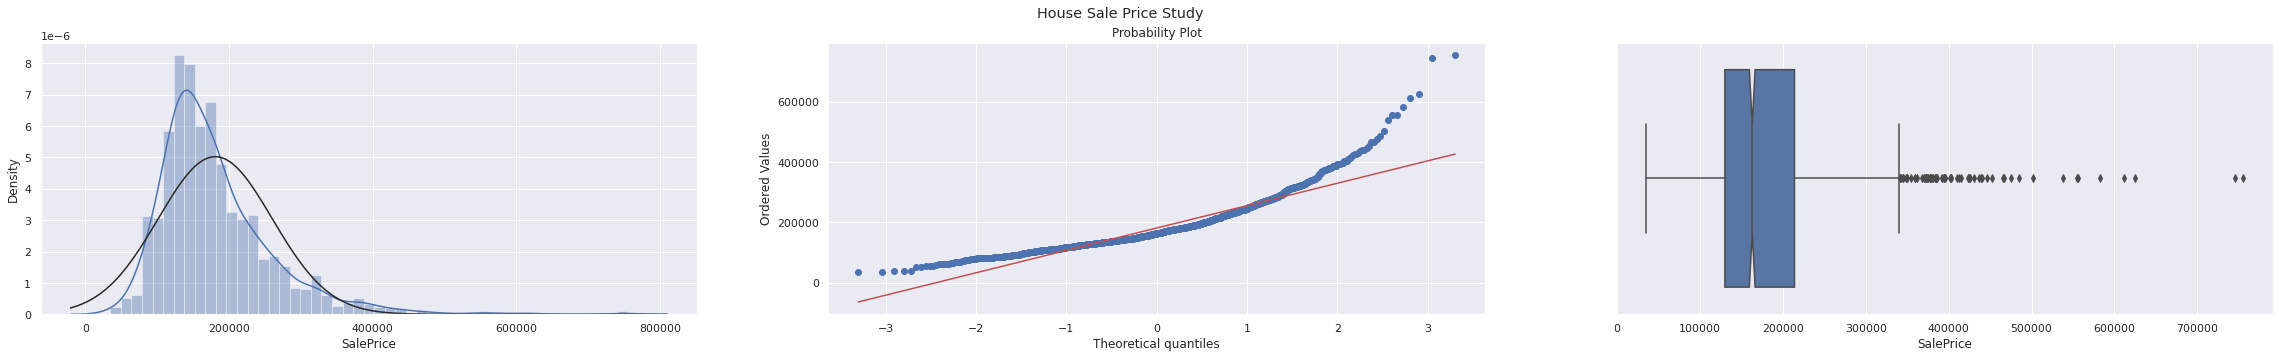

In [81]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(40,5))
fig.suptitle("House Sale Price Study")

# Histogram 
sns.distplot(dataset["SalePrice"], fit=stats.norm, ax=ax1)

# Q-Q Probability plot
stats.probplot(dataset["SalePrice"], plot=ax2)

#boxplot
sns.boxplot(dataset["SalePrice"], notch=True, ax=ax3)


print(f"Skewness Co-efficient: {round(dataset.SalePrice.skew(), 3)}")
plt.show()

Skewness Co-efficient: 0.121


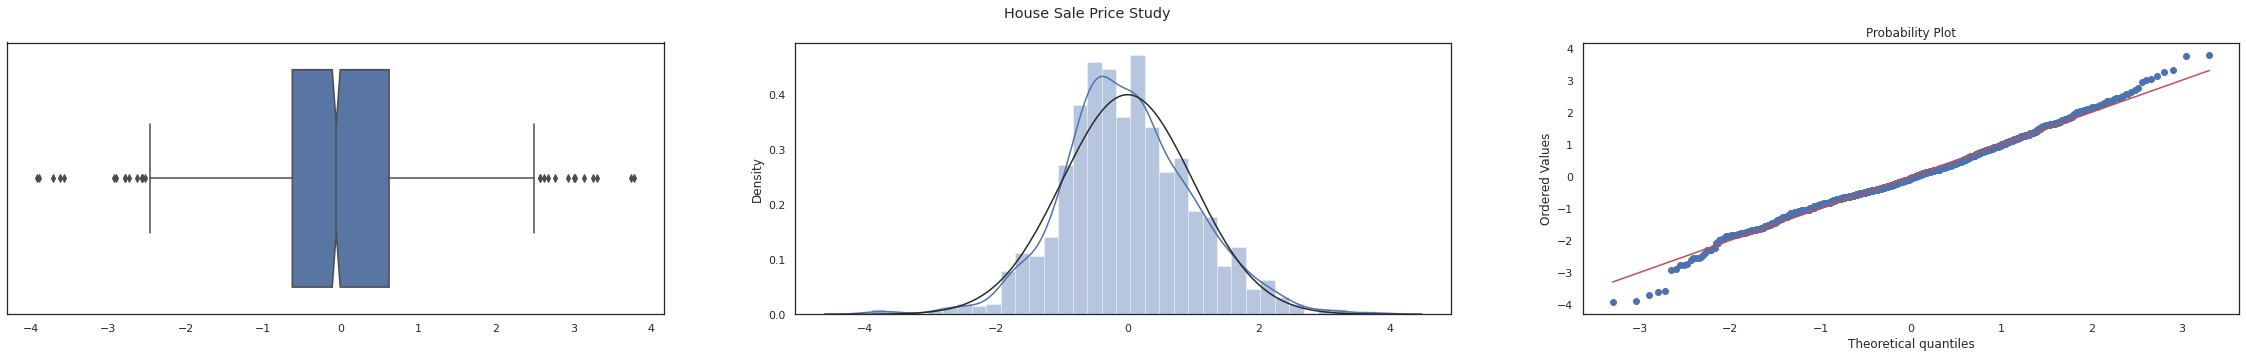

In [86]:
### log tranform + center-scale
sale_price = np.log1p(dataset["SalePrice"])
scaler = StandardScaler().fit(sale_price.values.reshape(-1,1))
transformed_target = scaler.transform(sale_price.values.reshape(-1,1))

print(f"Skewness Co-efficient: {round(sale_price.skew(), 3)}")

### Target description plots
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(40,5))
fig.suptitle("House Sale Price Study")

# Histogram 
sns.distplot(transformed_target, fit=stats.norm, ax=ax2)

# Q-Q Probability plot
### flatten center-scale tuple
import itertools
flattened_tranformed_target = list(itertools.chain(*transformed_target))
stats.probplot(np.asanyarray(flattened_tranformed_target), plot=ax3)

#boxplot
sns.boxplot(transformed_target, notch=True, ax=ax1)

plt.show()

## Covariance heatmap

<AxesSubplot:>

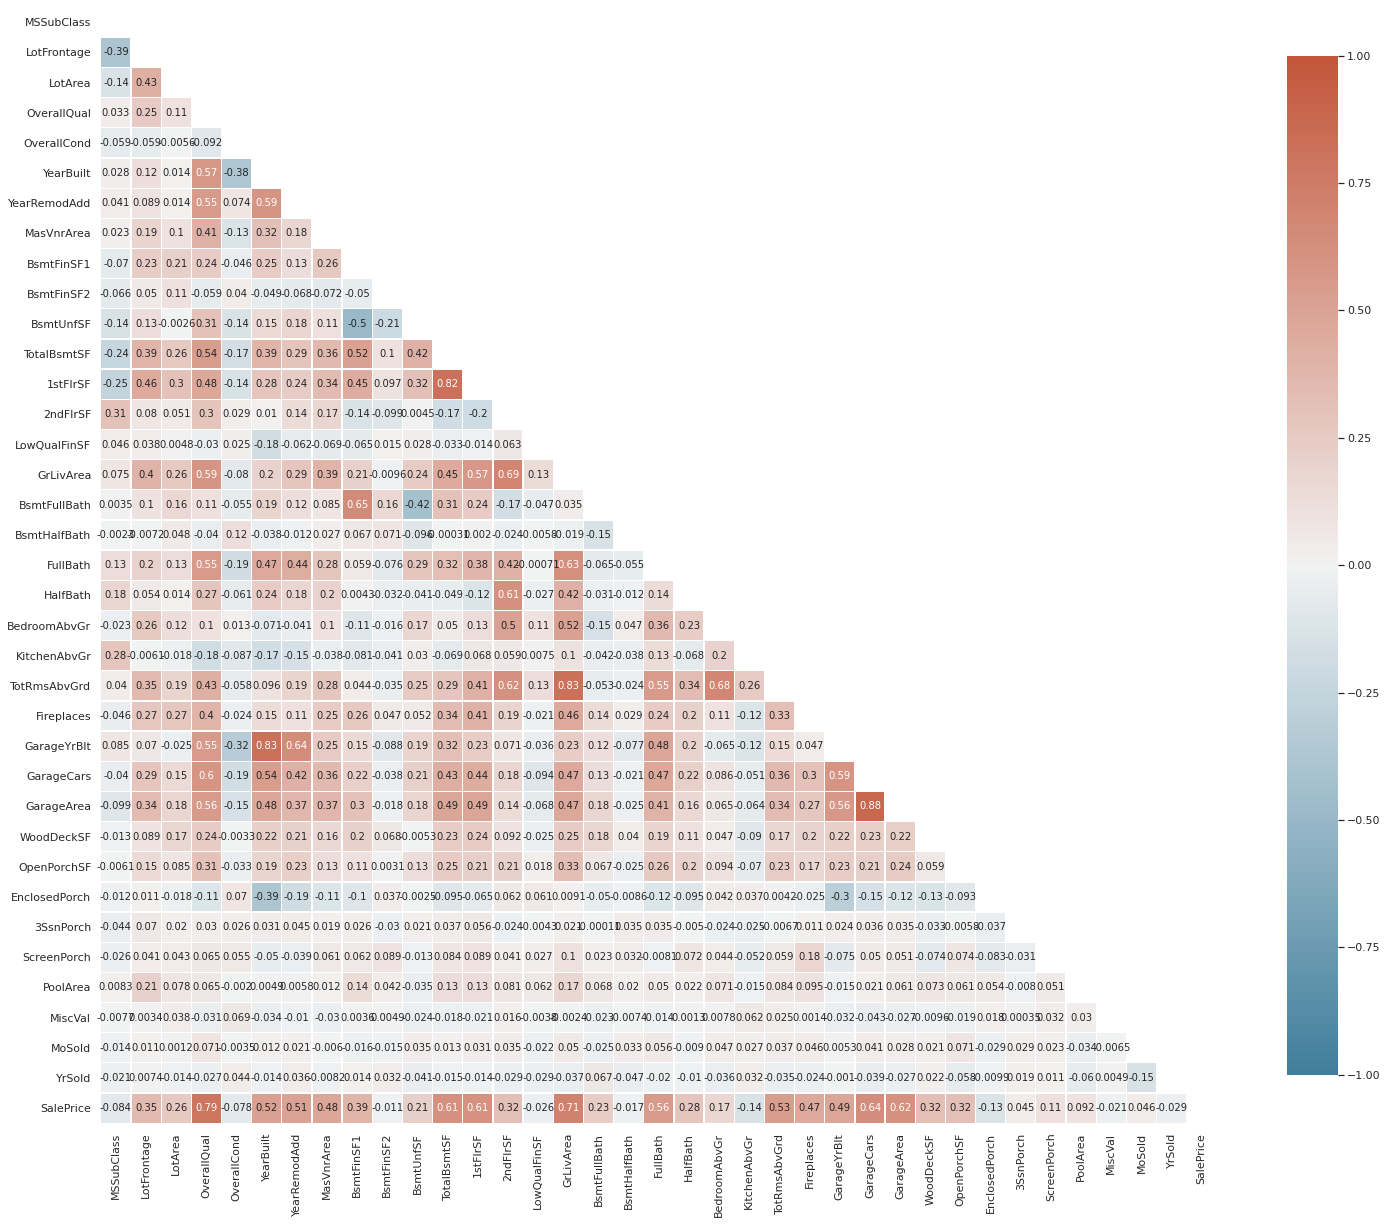

In [84]:
# Correlation matrix
corr = dataset.corr()

# Set up the matplotlib figure
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, vmax=1, vmin=-1,center=0,
            mask=mask, cmap=cmap, square=True,
            linewidths=.25, cbar_kws={"shrink": .75}, 
            annot=True, annot_kws={"size": 10})
